# Predicting player value with XGBoost

In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb

In [102]:
# set attributes of the notebook

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 8)



In [103]:
url = 'https://raw.githubusercontent.com/estebanvillaturek/fifa19/master/fifa19_data.csv'

In [104]:
data = pd.read_csv(url)

In [105]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,...,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,...,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,...,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,...,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,...,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,...,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [106]:
data.Value

0        €110.5M
1           €77M
2        €118.5M
3           €72M
          ...   
18203       €60K
18204       €60K
18205       €60K
18206       €60K
Name: Value, Length: 18207, dtype: object

In [107]:
data.shape

(18207, 89)

In [108]:
# Remove €

data.Value = data.Value.apply(lambda x: x.replace('€', ''))

In [109]:
# simulate an iterator to check what will be returned 

next(data.Value.items())

(0, '110.5M')

In [110]:
# Reformat thousands cells

for i,j in data.Value.items():
    if 'K' in j:
        data.Value.iloc[i] = float(j.replace('K', '')) * 1000

//anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [111]:
data.Value
    

0        110.5M
1           77M
2        118.5M
3           72M
          ...  
18203     60000
18204     60000
18205     60000
18206     60000
Name: Value, Length: 18207, dtype: object

In [112]:
# Reformat millions cells

for i,j in data.Value.items():
    if 'M' in j:
        data.Value.iloc[i] = float(j.replace('M', '')) * 1000000

TypeError: argument of type 'float' is not iterable

In [113]:
data.Value

0        1.105e+08
1          7.7e+07
2        1.185e+08
3          7.2e+07
           ...    
18203        60000
18204        60000
18205        60000
18206        60000
Name: Value, Length: 18207, dtype: object

In [114]:
data.Value.dtype

dtype('O')

In [115]:
data.Value = pd.to_numeric(data.Value, errors = 'coerce')

In [116]:
data.Value.dtype

dtype('float64')

In [117]:
data.dtypes

Unnamed: 0          int64
ID                  int64
Name               object
Age                 int64
                   ...   
GKKicking         float64
GKPositioning     float64
GKReflexes        float64
Release Clause     object
Length: 89, dtype: object

### Create a new all-numeric dataframe to run the model

In [118]:
scores = pd.DataFrame(data.Value)

scores

,Value
0,110500000.0
1,77000000.0
2,118500000.0
3,72000000.0
...,...
18203,60000.0
18204,60000.0
18205,60000.0
18206,60000.0


In [119]:


data.columns[54:88]

data1 = data.iloc[:, 54:88]

In [120]:
data1

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18203,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0
18204,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0
18205,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0
18206,41.0,34.0,46.0,48.0,30.0,43.0,40.0,34.0,44.0,51.0,57.0,55.0,55.0,51.0,63.0,43.0,62.0,47.0,60.0,32.0,56.0,42.0,34.0,49.0,33.0,43.0,40.0,43.0,50.0,10.0,15.0,9.0,12.0,9.0


In [121]:
scores.shape

(18207, 1)

In [122]:
data1.shape

(18207, 34)

In [123]:
scores = pd.concat([scores, data1], axis = 1)

In [124]:
scores.shape

(18207, 35)

In [125]:
scores.dtypes

Value              float64
Crossing           float64
Finishing          float64
HeadingAccuracy    float64
                    ...   
GKHandling         float64
GKKicking          float64
GKPositioning      float64
GKReflexes         float64
Length: 35, dtype: object

### Explore how the data are distributed

This is fundamental to understand how the data are behaving and whether or not we have to regularise our data. Remember that here we do not need to normalise the data, since the scale is all the same across predictors.

In [126]:
# There's a slight tendency in the data to be left skewed (except for Value)

scores.describe()


,Value,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,1.228000e+04,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,1.872707e+06,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,6.496163e+06,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000e+00,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.100000e+05,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,4.250000e+05,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,7.000000e+05,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,1.185000e+08,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


ValueError: cannot convert float NaN to integer

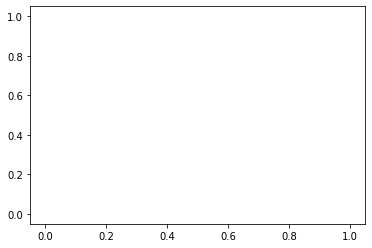

In [127]:
# visualize the distribution of 'Value'

sns.distplot(scores.Value)


In [128]:
# If we were to delete all missing values, we would lose around 6k data points

scores.isnull().sum()

Value              5927
Crossing             48
Finishing            48
HeadingAccuracy      48
                   ... 
GKHandling           48
GKKicking            48
GKPositioning        48
GKReflexes           48
Length: 35, dtype: int64

In [129]:
# to not lose around 6k datapoints, let's explore missing data imputation - We'll use the median value of each column, particularly beacuse there's a hight tendency to skewness, especially in 'Value'

scores.iloc[:, :].fillna(scores.iloc[:, :].median(), inplace = True)

print(scores.isnull().sum())

Value              0
Crossing           0
Finishing          0
HeadingAccuracy    0
                  ..
GKHandling         0
GKKicking          0
GKPositioning      0
GKReflexes         0
Length: 35, dtype: int64


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


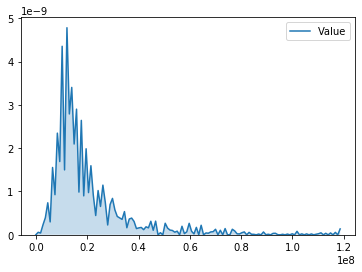

<Figure size 1080x720 with 0 Axes>

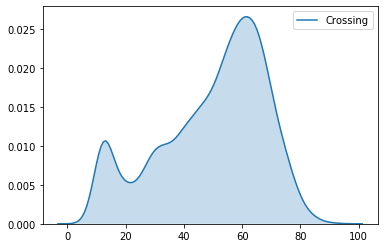

<Figure size 1080x720 with 0 Axes>

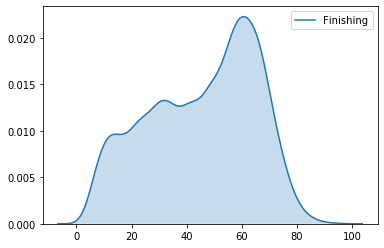

<Figure size 1080x720 with 0 Axes>

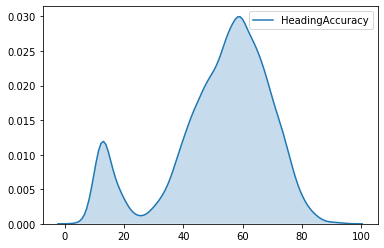

<Figure size 1080x720 with 0 Axes>

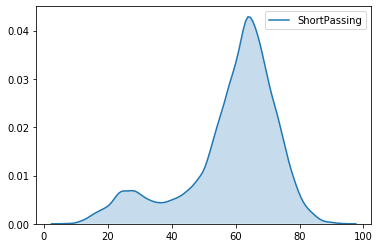

<Figure size 1080x720 with 0 Axes>

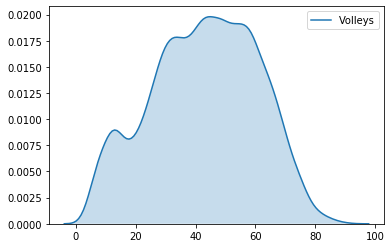

<Figure size 1080x720 with 0 Axes>

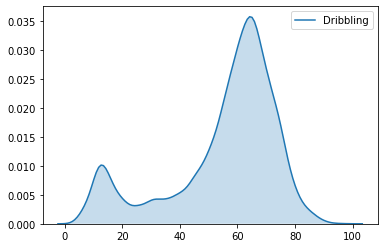

<Figure size 1080x720 with 0 Axes>

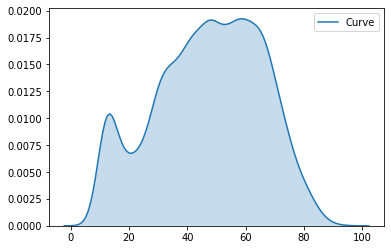

<Figure size 1080x720 with 0 Axes>

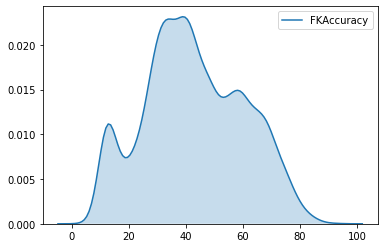

<Figure size 1080x720 with 0 Axes>

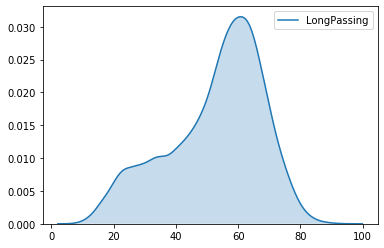

<Figure size 1080x720 with 0 Axes>

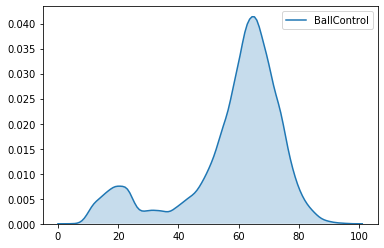

<Figure size 1080x720 with 0 Axes>

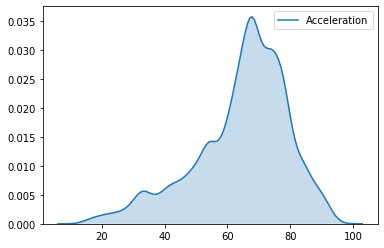

<Figure size 1080x720 with 0 Axes>

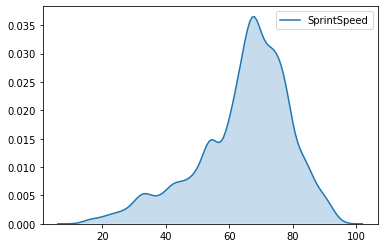

<Figure size 1080x720 with 0 Axes>

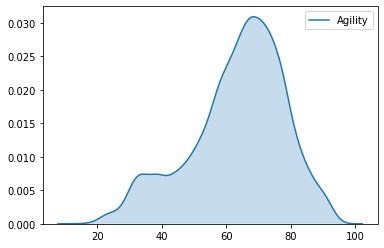

<Figure size 1080x720 with 0 Axes>

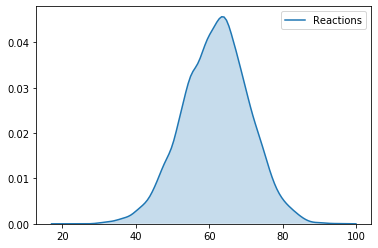

<Figure size 1080x720 with 0 Axes>

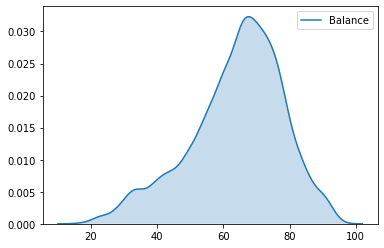

<Figure size 1080x720 with 0 Axes>

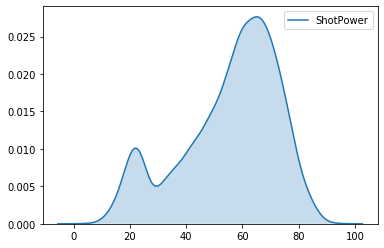

<Figure size 1080x720 with 0 Axes>

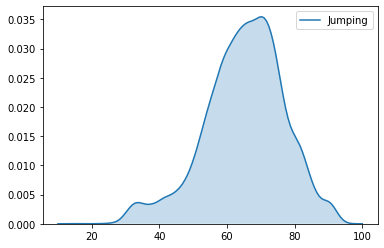

<Figure size 1080x720 with 0 Axes>

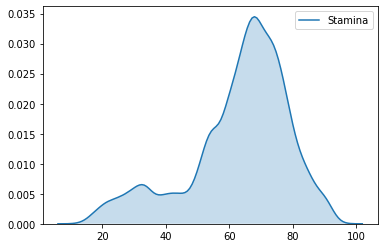

<Figure size 1080x720 with 0 Axes>

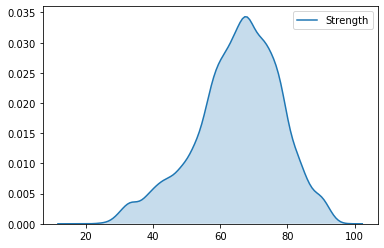

<Figure size 1080x720 with 0 Axes>

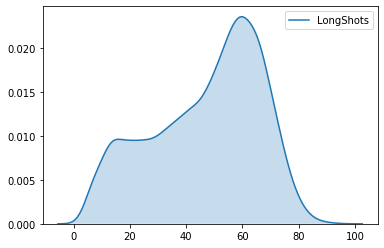

<Figure size 1080x720 with 0 Axes>

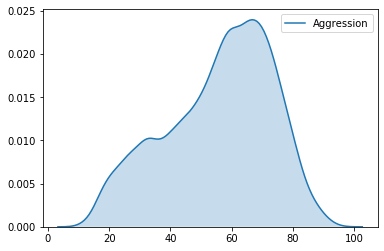

<Figure size 1080x720 with 0 Axes>

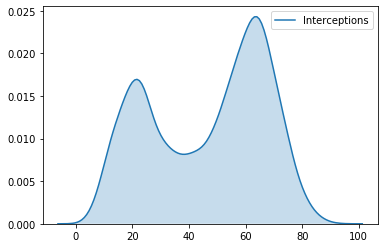

<Figure size 1080x720 with 0 Axes>

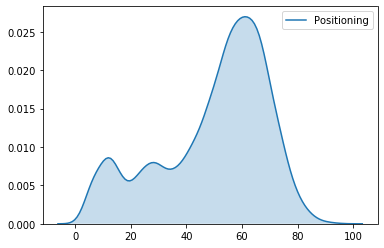

<Figure size 1080x720 with 0 Axes>

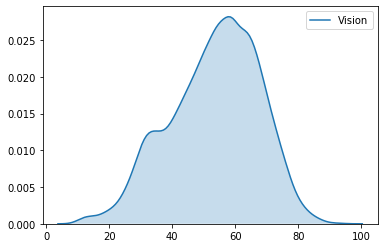

<Figure size 1080x720 with 0 Axes>

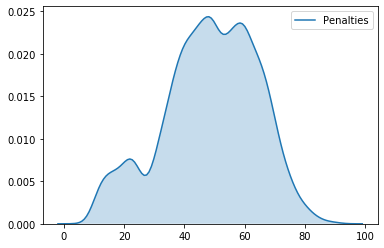

<Figure size 1080x720 with 0 Axes>

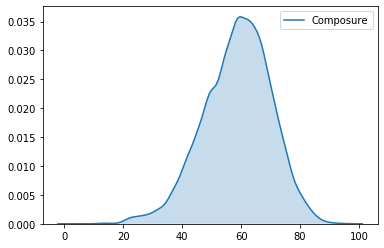

<Figure size 1080x720 with 0 Axes>

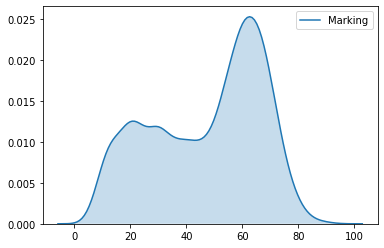

<Figure size 1080x720 with 0 Axes>

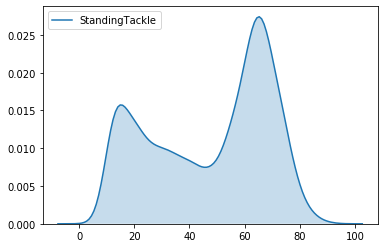

<Figure size 1080x720 with 0 Axes>

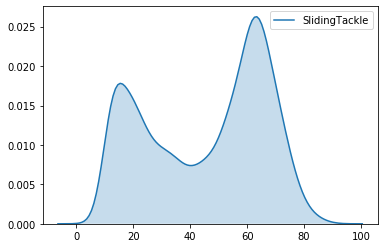

<Figure size 1080x720 with 0 Axes>

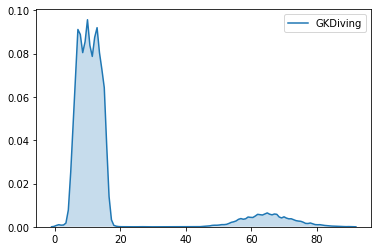

<Figure size 1080x720 with 0 Axes>

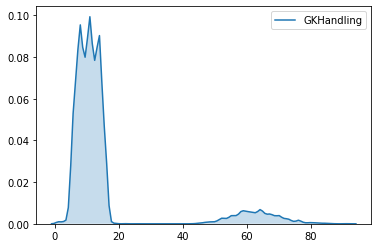

<Figure size 1080x720 with 0 Axes>

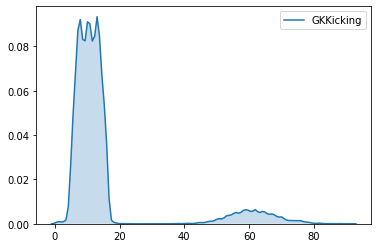

<Figure size 1080x720 with 0 Axes>

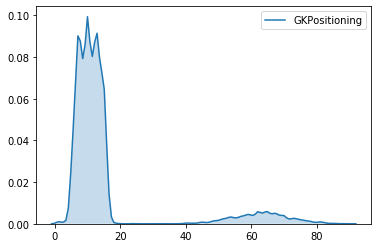

<Figure size 1080x720 with 0 Axes>

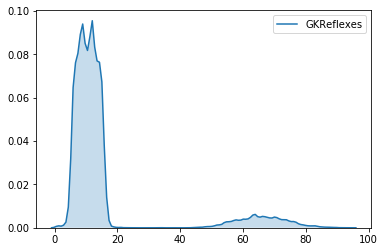

<Figure size 1080x720 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [130]:
# Explore the distribution of each variable

provisional = scores

for i, j in provisional.items():
    sns.kdeplot(j, shade = True)
    plt.figure(figsize=(15,10))
    plt.figure()

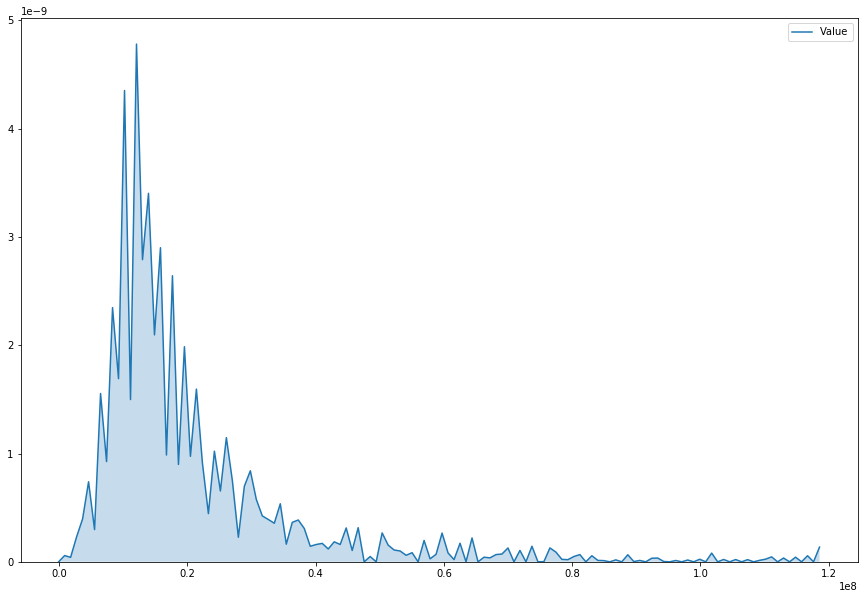

In [131]:
# How is 'Value' distributed?

plt.figure(figsize=(15,10))
sns.kdeplot(scores.Value, shade = True)

In [132]:
# Separate examples and target

X = scores.iloc[:, 1:]

y = scores.iloc[:, 0]

In [133]:
# Now we'll first normalize the data so that we can have it in a 0 to 1 range and then standardize it

from sklearn import preprocessing

nrm_X = preprocessing.normalize(X)

std_X1 = preprocessing.scale(X)

std_X = preprocessing.scale(nrm_X)



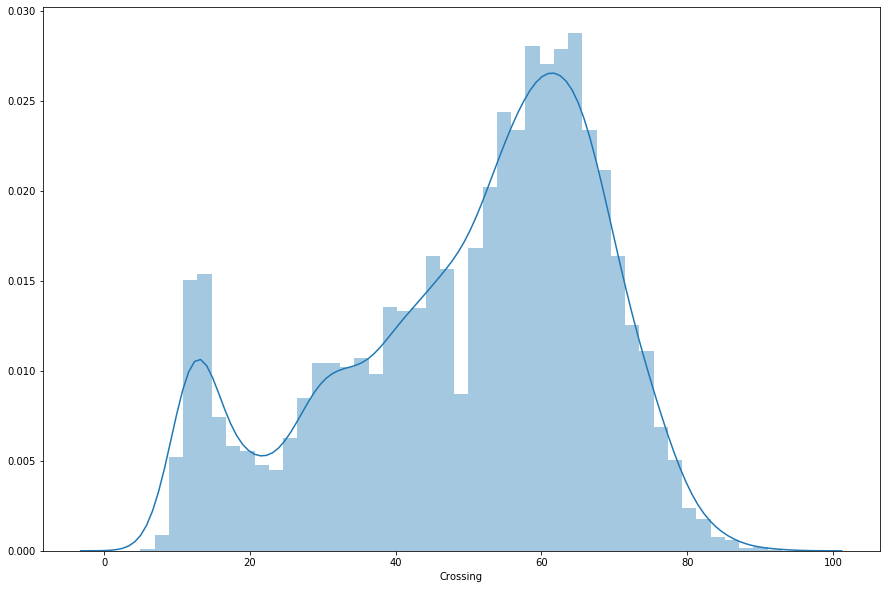

In [134]:
# Check the original 'Crossing' distribution

plt.figure(figsize=(15,10))
sns.distplot(scores.Crossing)

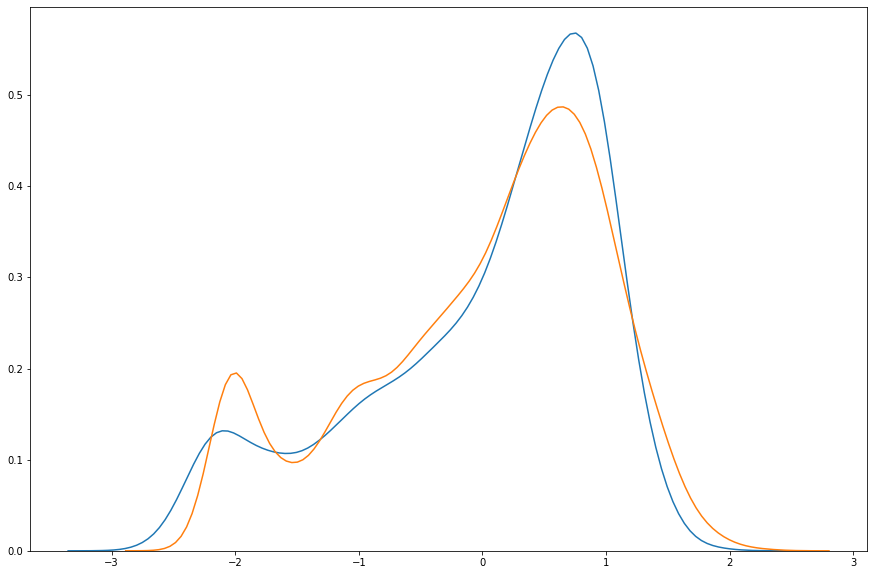

In [135]:
# Assess the difference visually


plt.figure(figsize=(15,10))

sns.kdeplot(std_X[:, 0])

sns.kdeplot(std_X1[:, 0]) 


0

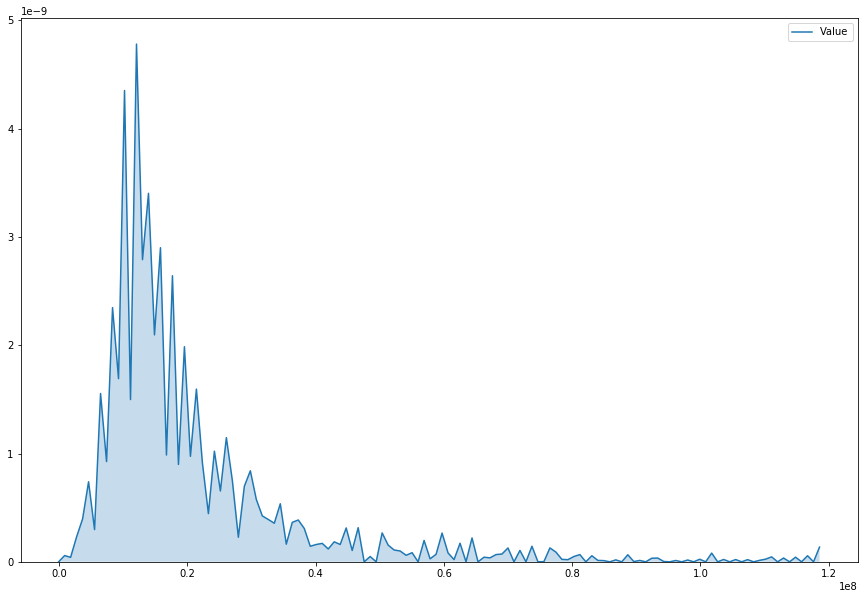

In [136]:
# Now we'll have to rescale the target variable - we'll log-transform it - it's crazy skewed

plt.figure(figsize=(15,10))
sns.kdeplot(y, shade = True)

y[y == 0].count() # we have 252 zeros in 'Value' - we have to impute the with the median

y[y == 0] = np.median(scores.Value)

y[y == 0].count() # ready, now we can log-transform the variable w/o getting any - inf values





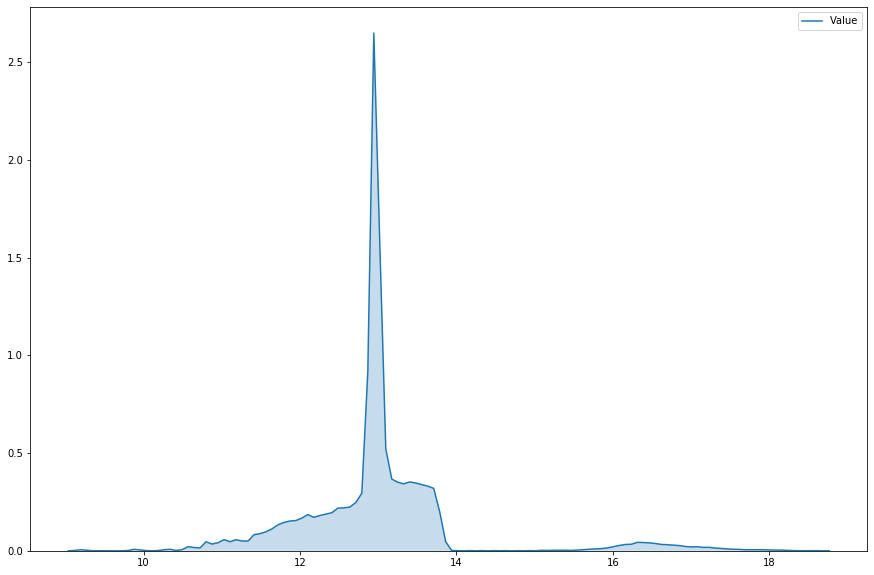

In [137]:
# do the log-transformation - looks much better!

y_log = np.log1p(y)

plt.figure(figsize = (15,10))
sns.kdeplot(y_log, shade = True)

In [142]:
# now we can just do the exponential of y to get back to the original values

print(y_log[0])

print(np.exp(y_log[0]))

print(np.expm1(y_log[0]))

print(scores.Value[0])


18.520526087971856
110500001.00000006
110500000.00000006
110500000.0


# Build the XGBoost regression model

//anaconda3/lib/python3.7/site-packages/seaborn/regression.py:279: RuntimeWarning: invalid value encountered in log
  grid = np.c_[np.ones(len(grid)), np.log(grid)]


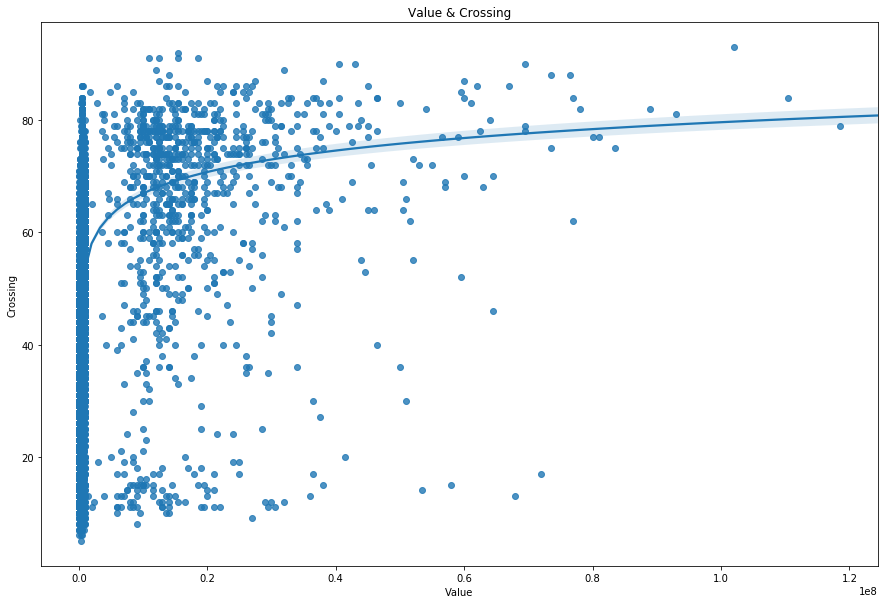

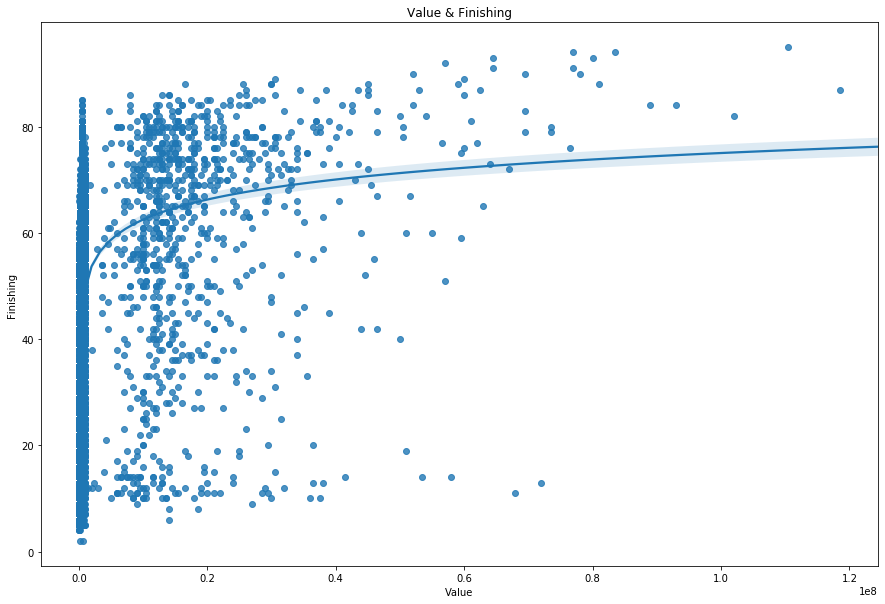

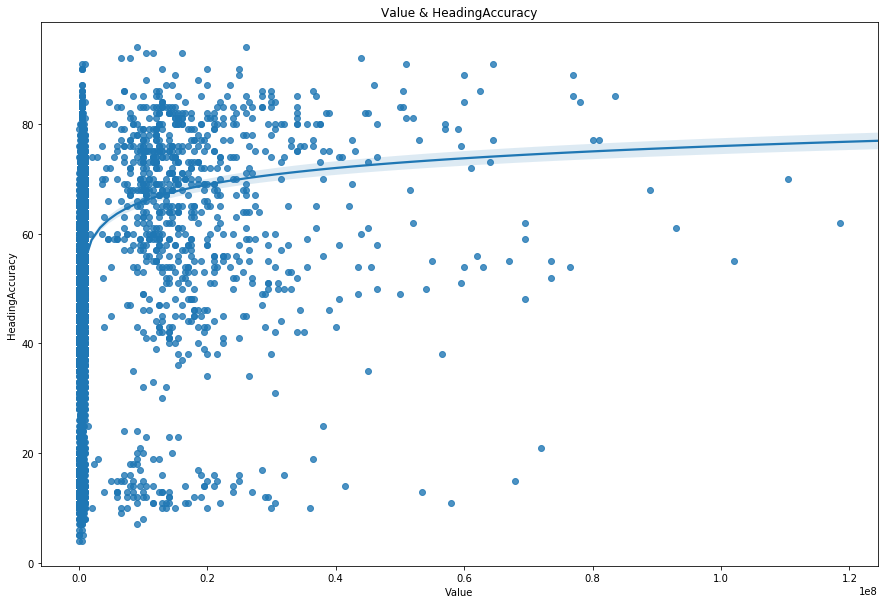

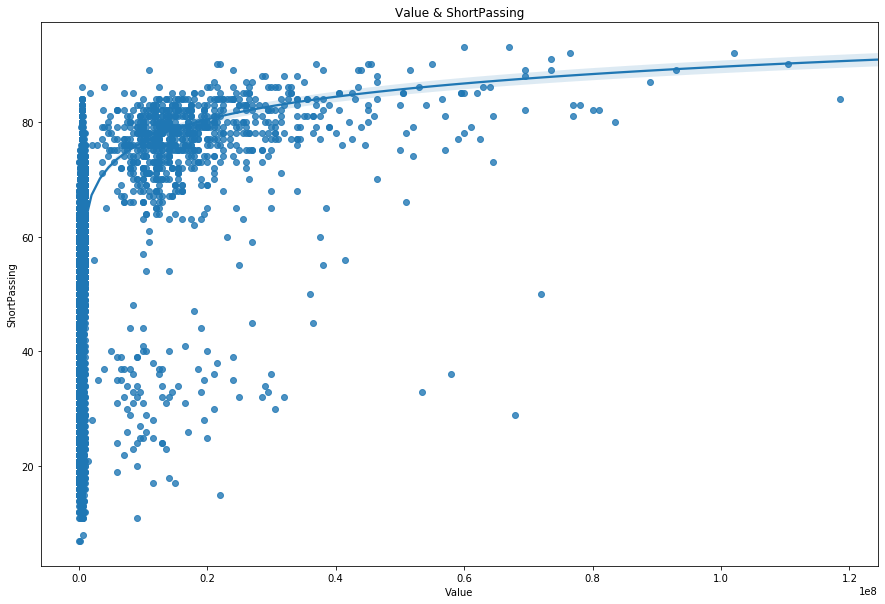

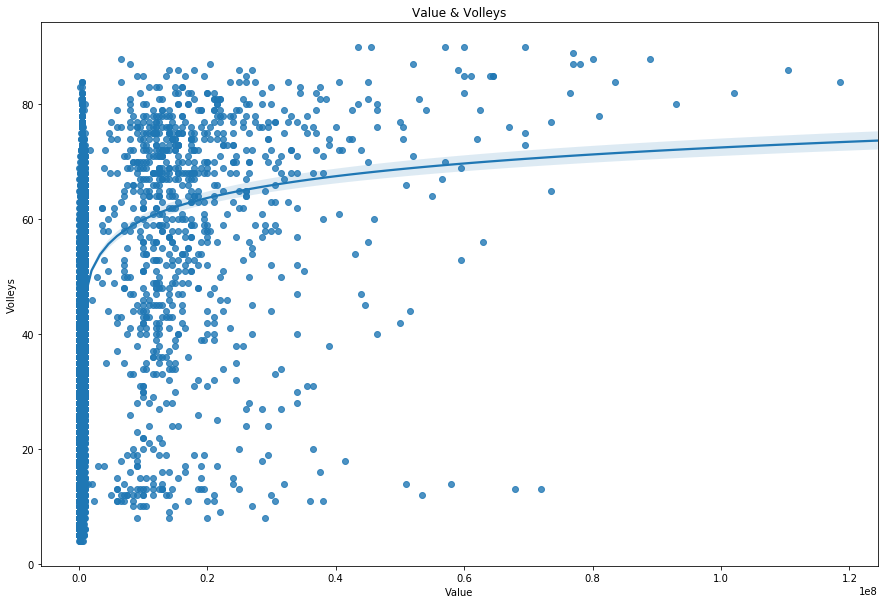

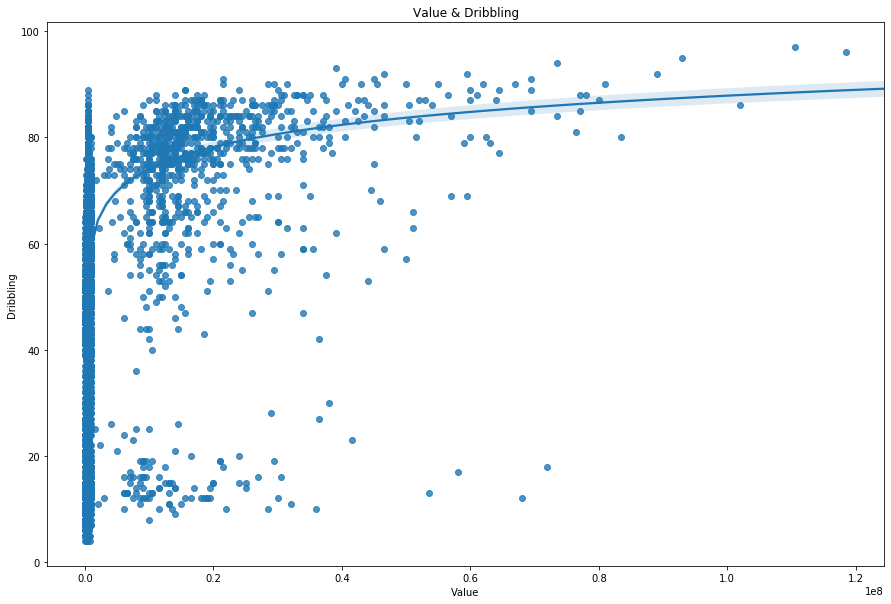

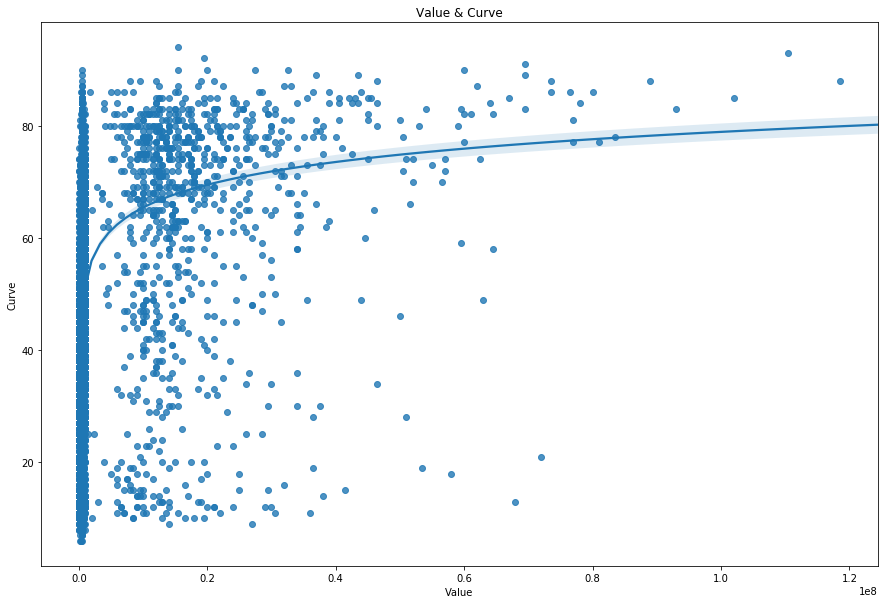

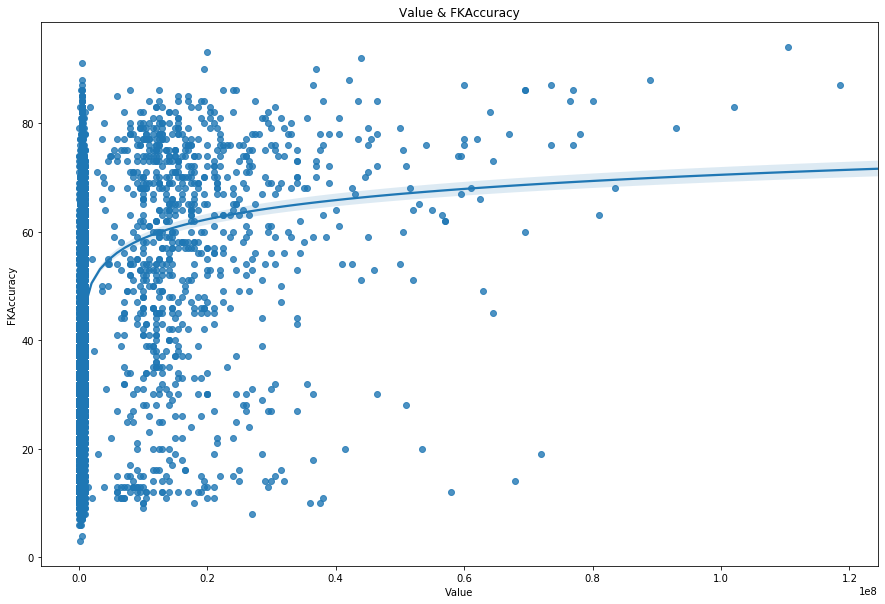

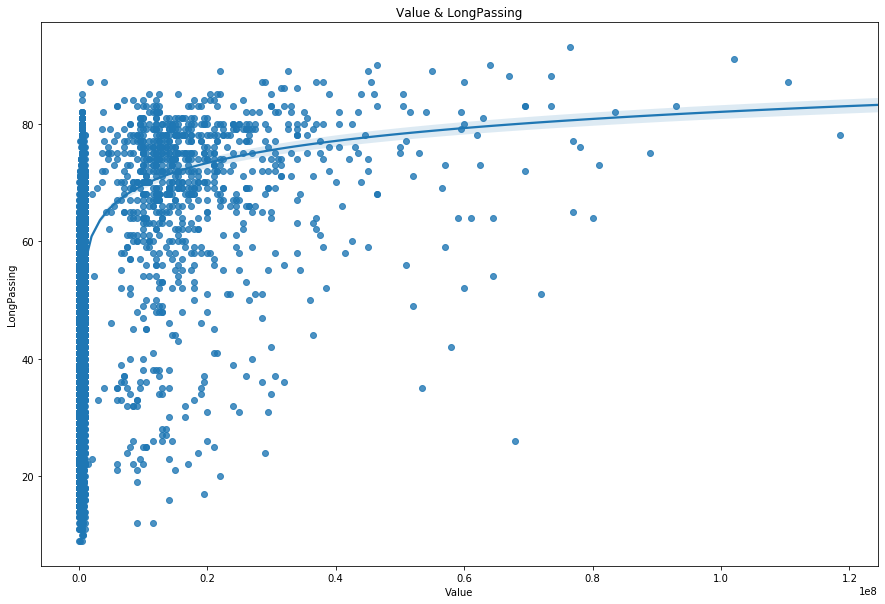

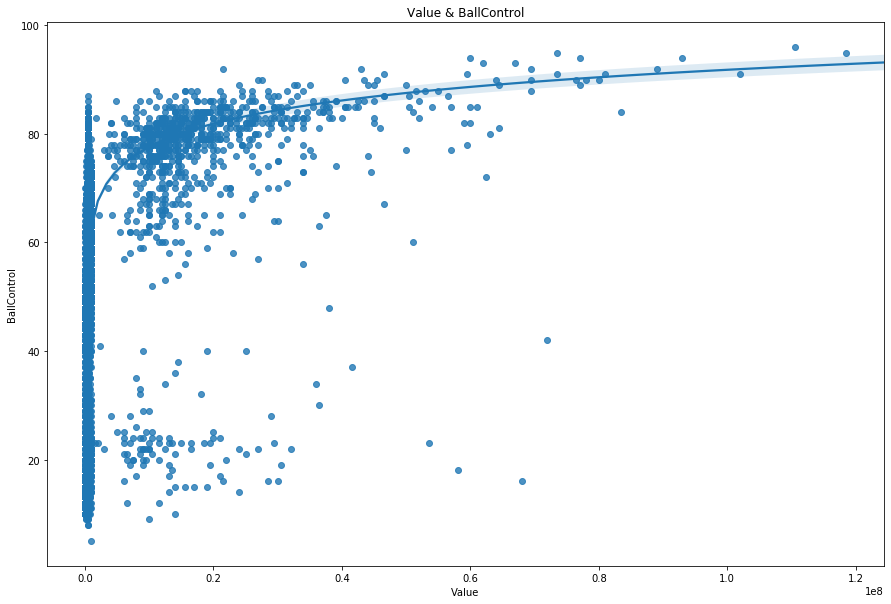

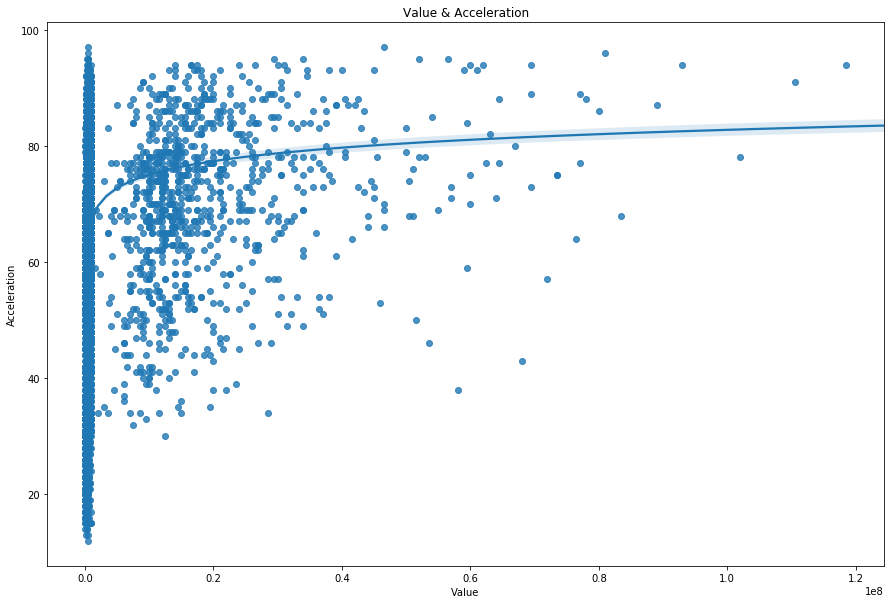

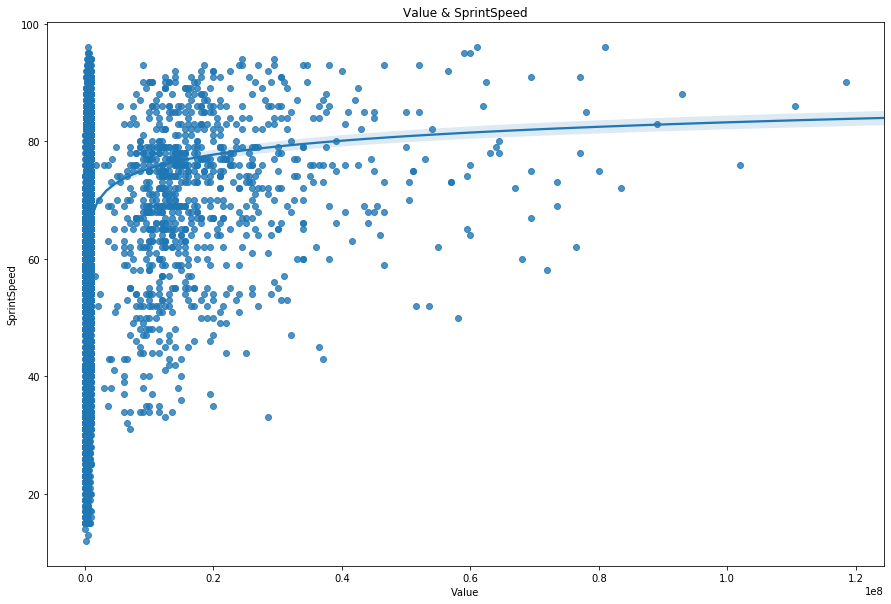

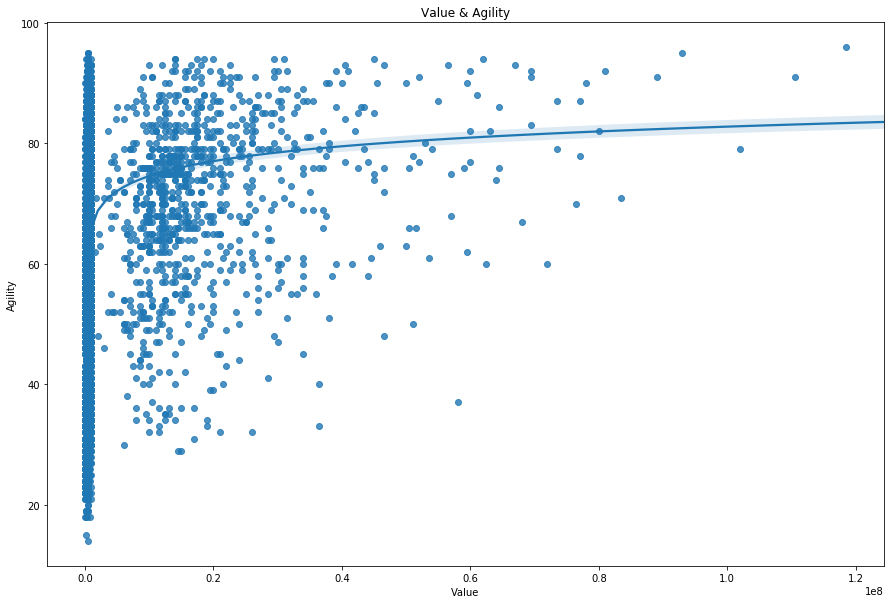

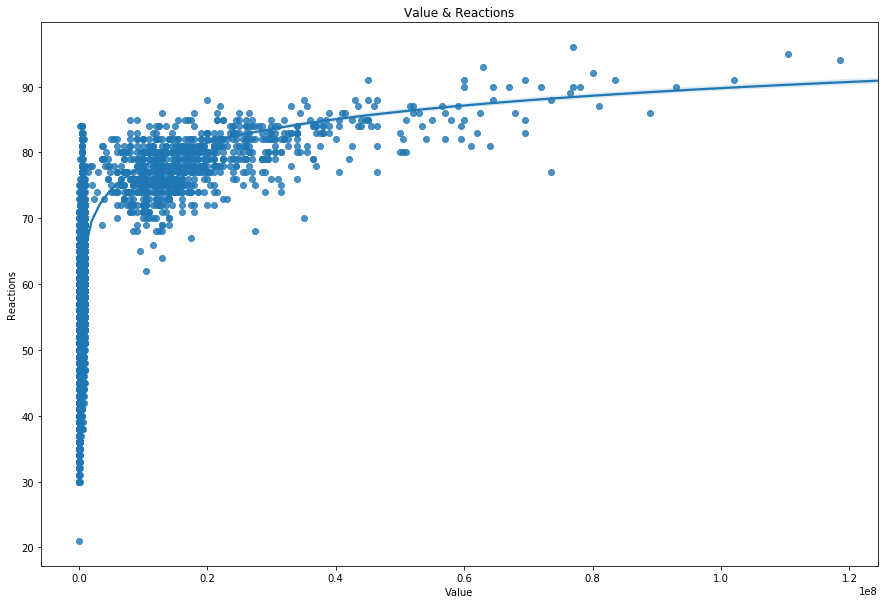

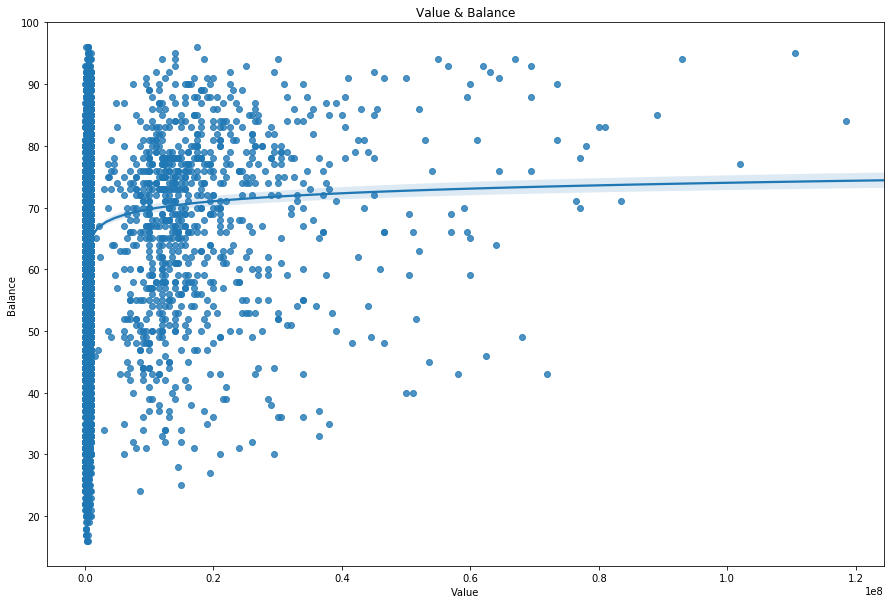

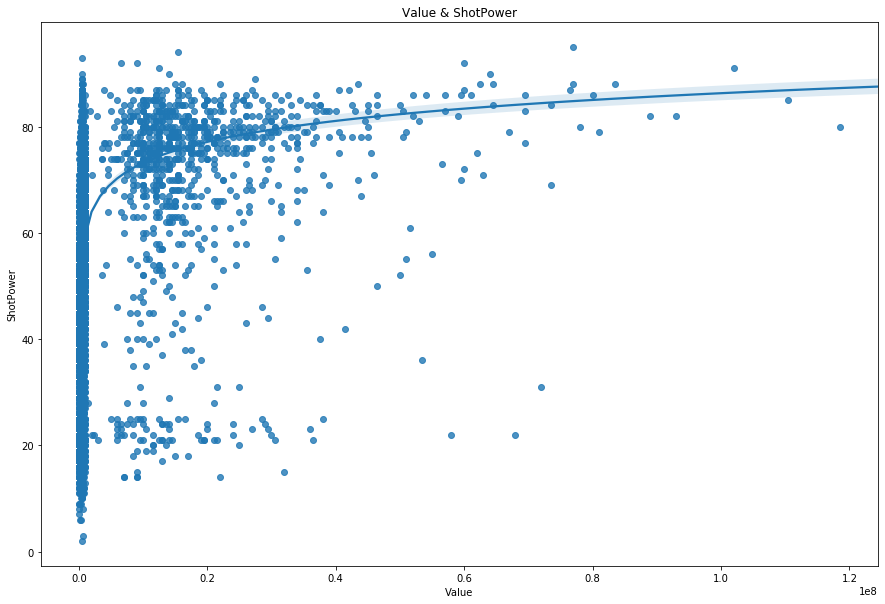

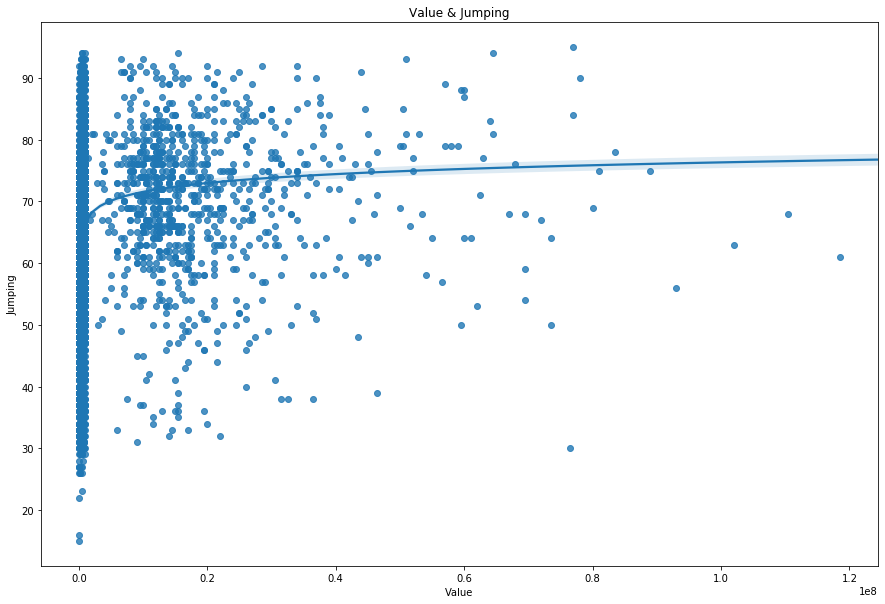

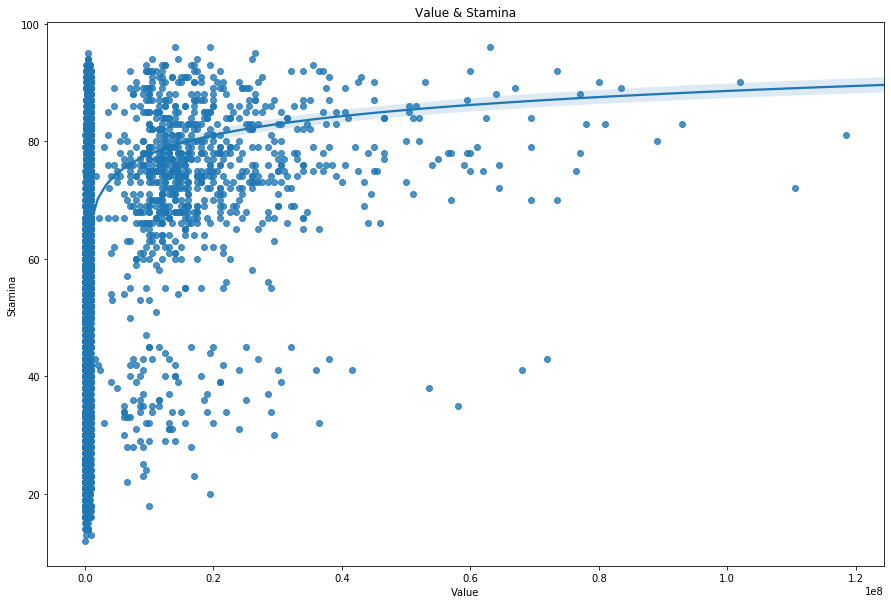

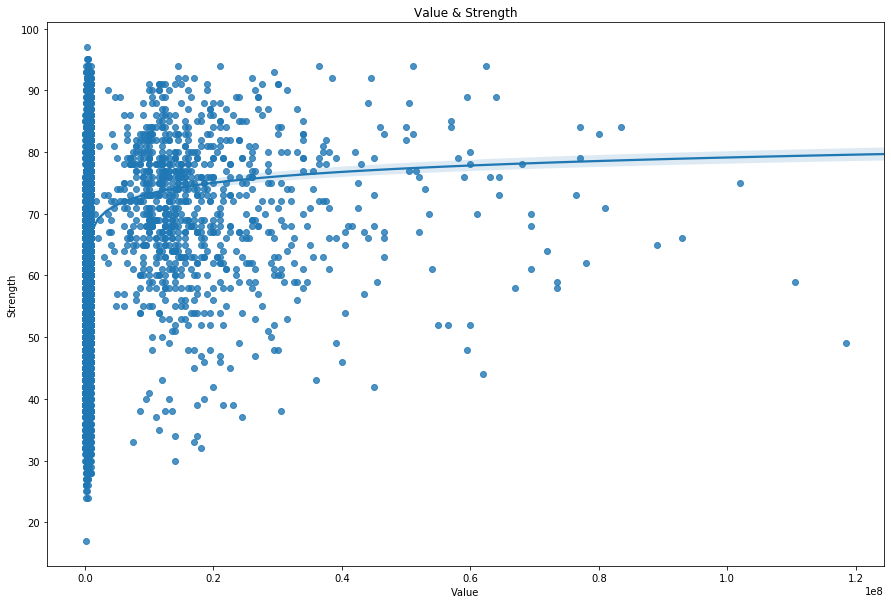

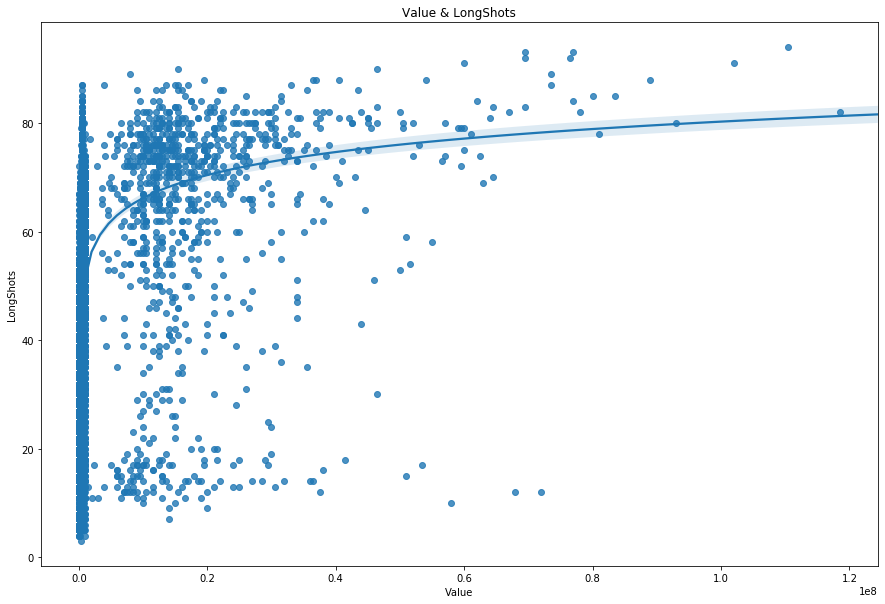

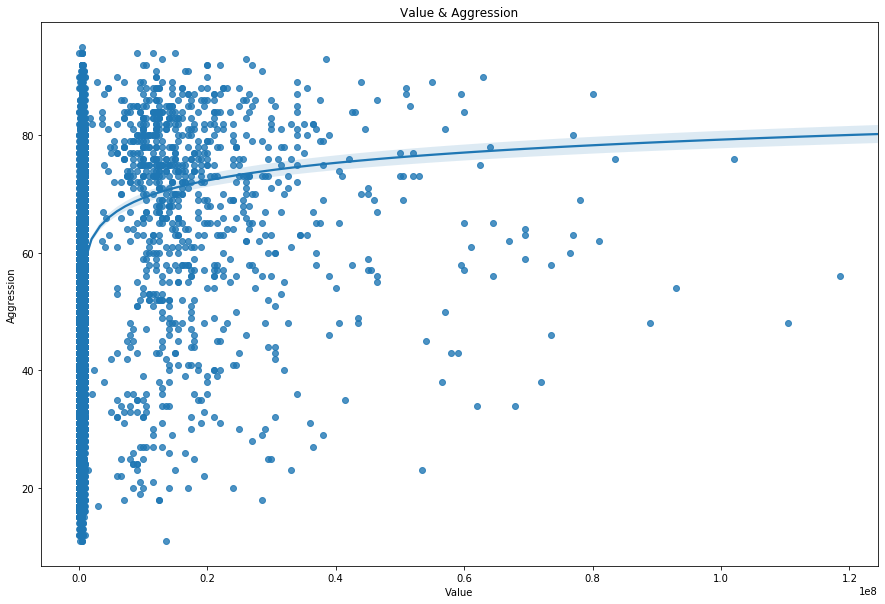

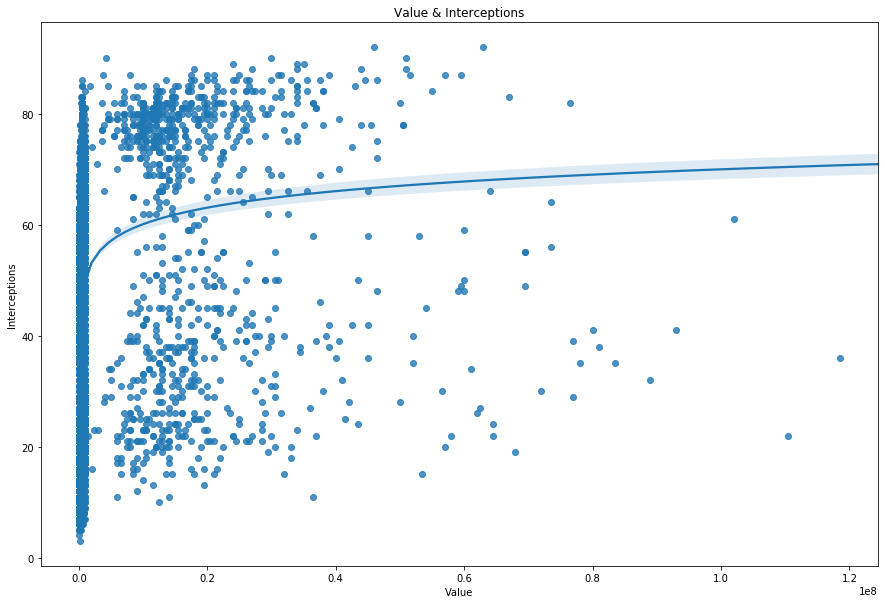

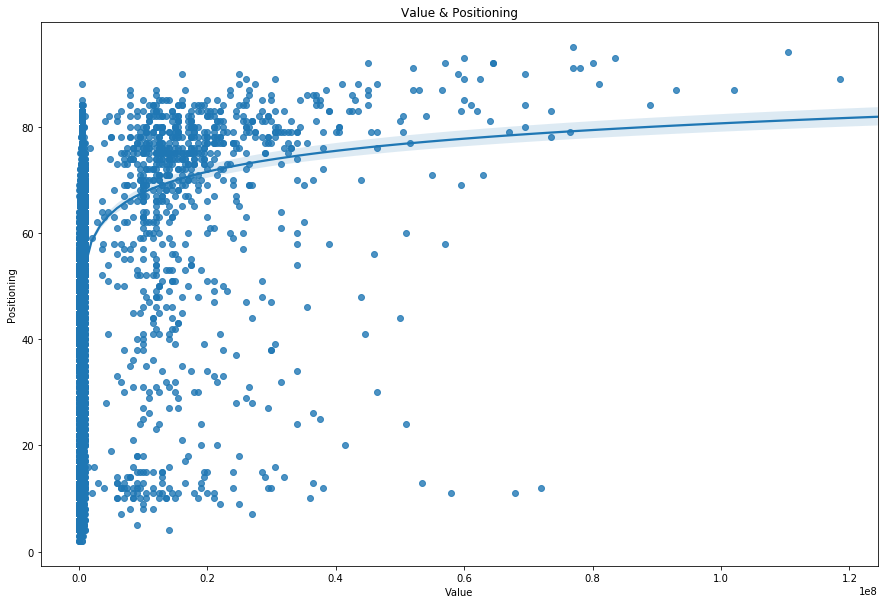

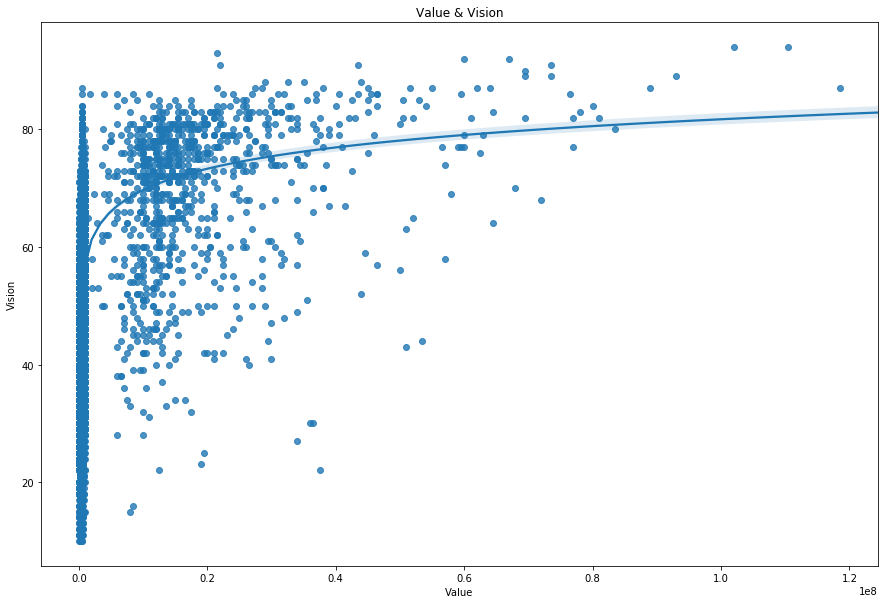

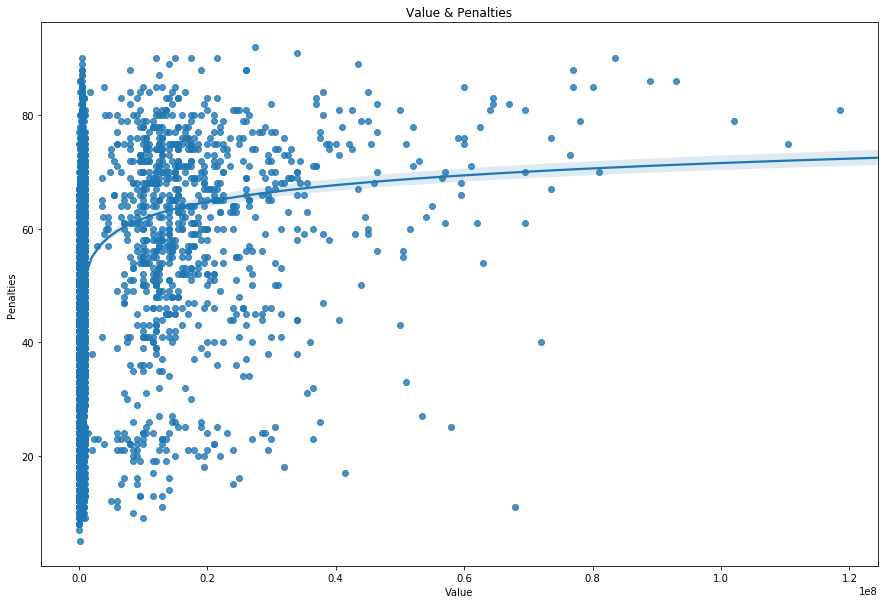

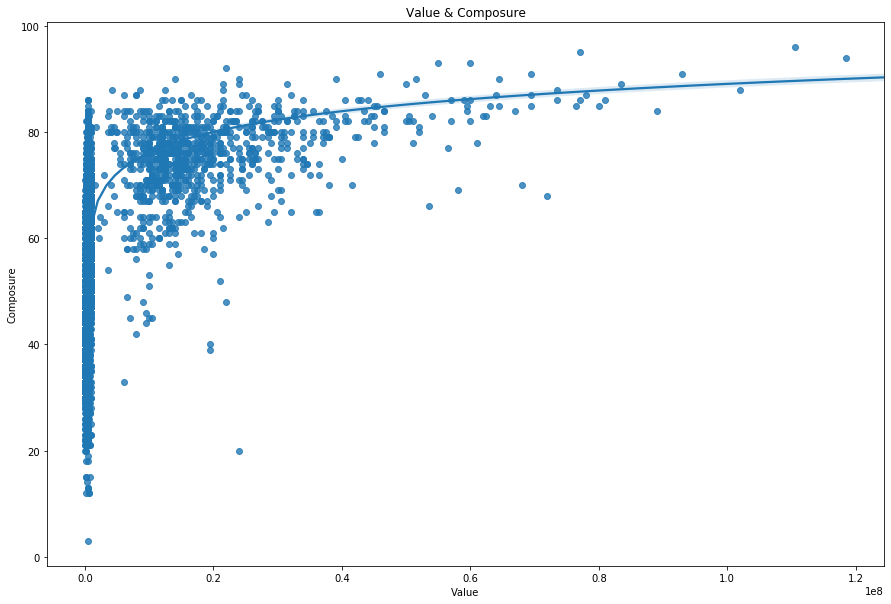

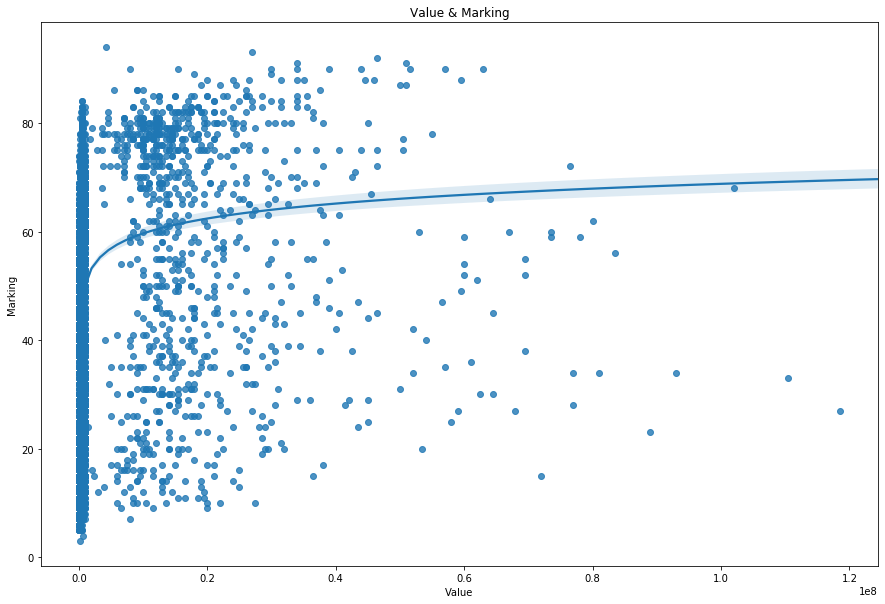

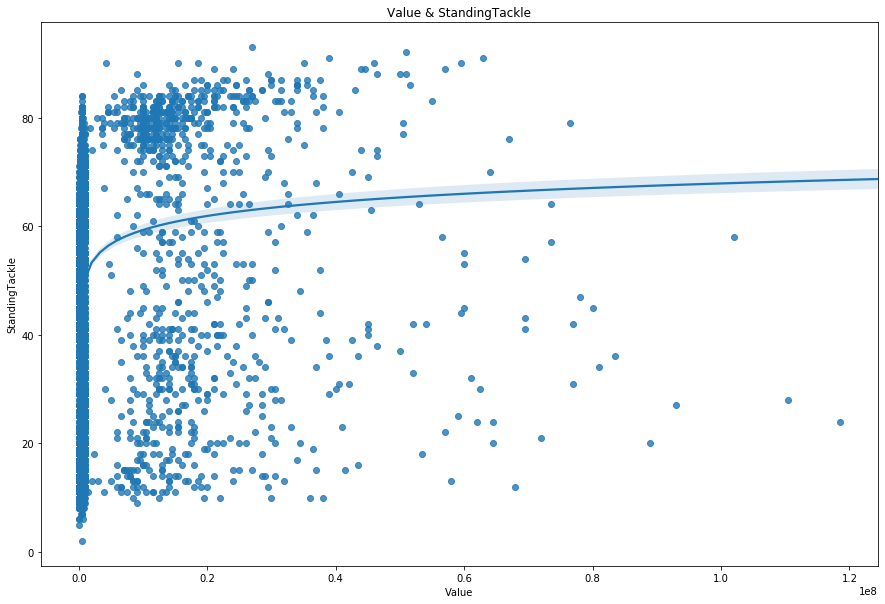

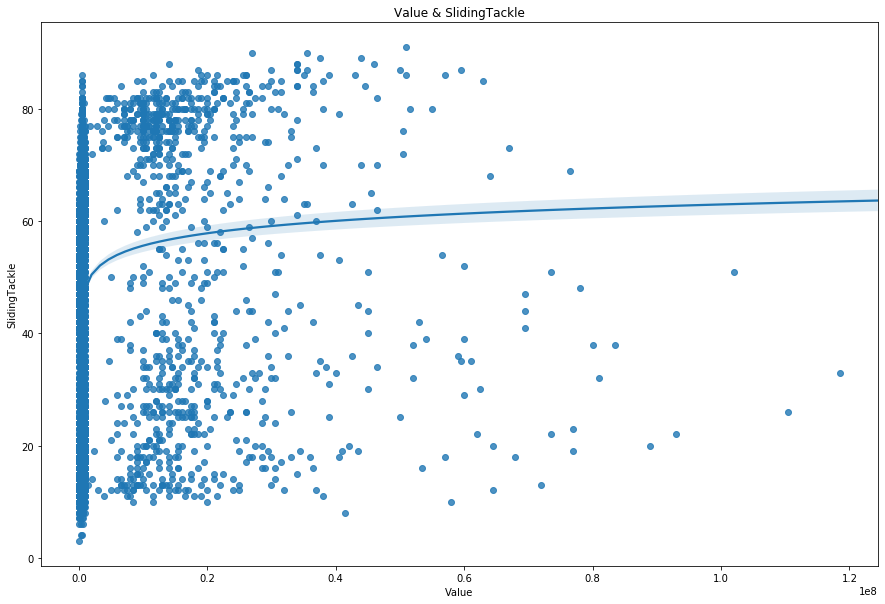

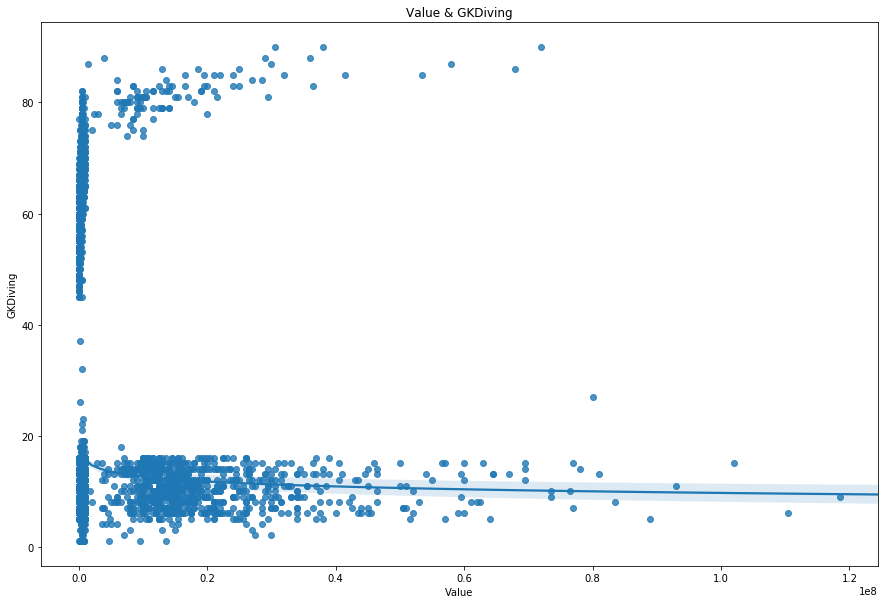

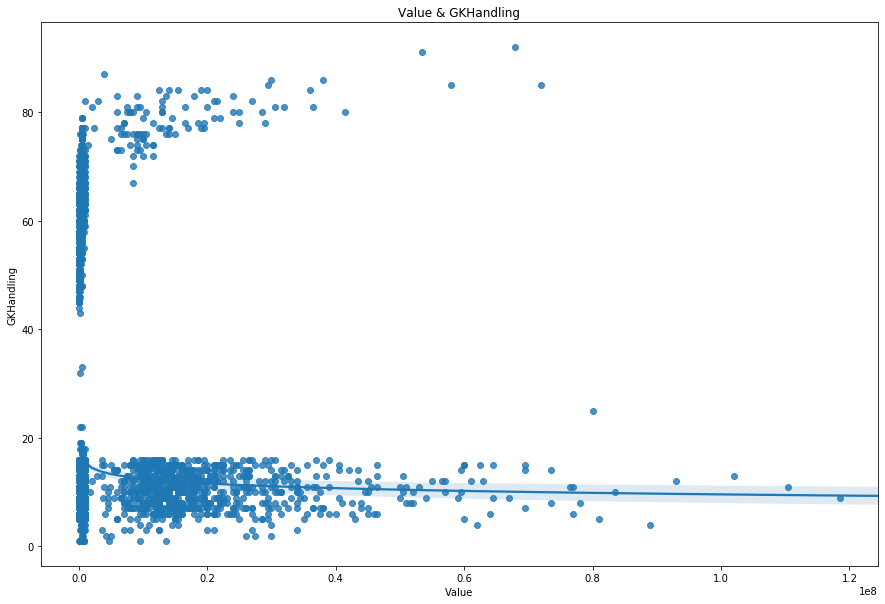

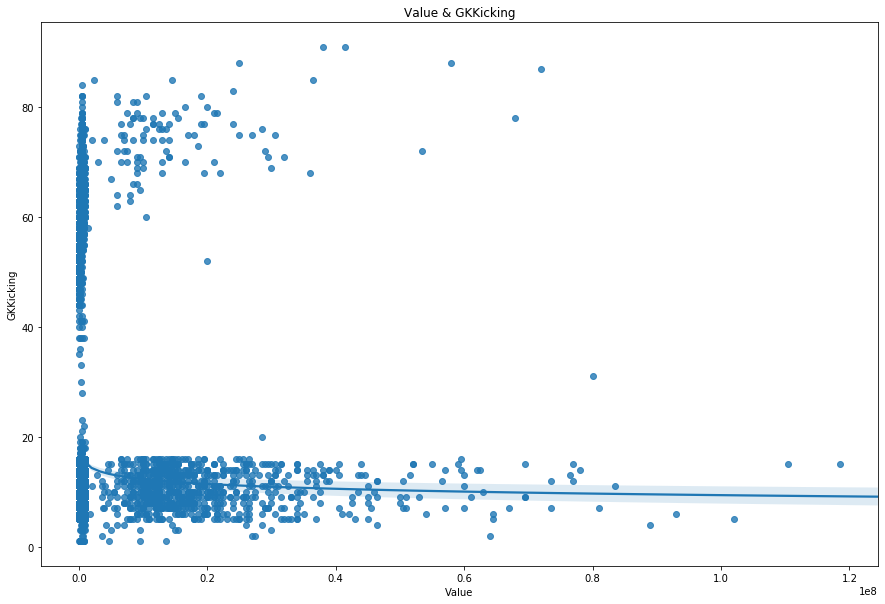

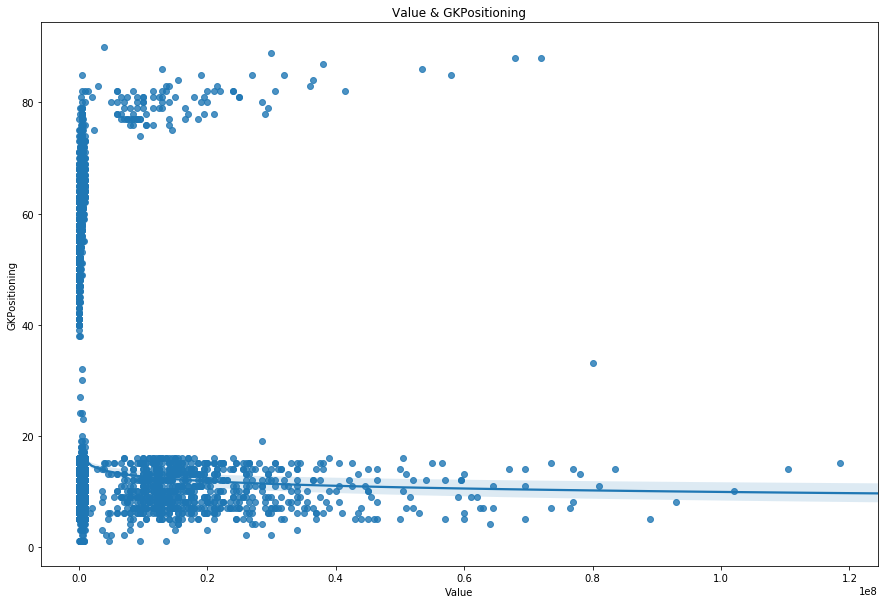

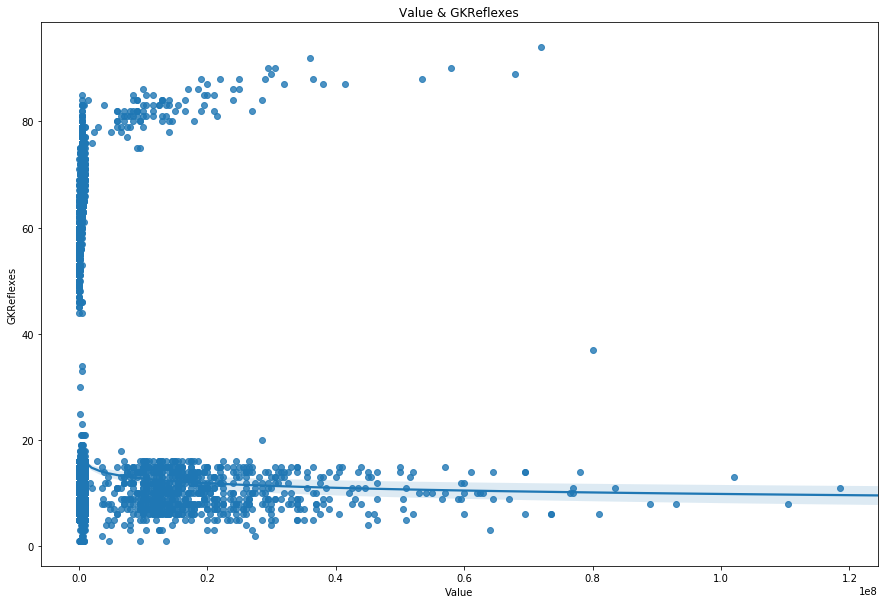

In [143]:
x_col = "Value"
y_columns = scores.loc[:, scores.columns != 'Value']



for y_col in y_columns:

    figure = plt.figure
    plt.figure(figsize = (15,10))
    ax = sns.regplot(x=x_col, y=y_col, data = scores, logx = True, truncate = False)
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title("{} & {}".format(x_col, y_col))

    plt.show()



## Split the data

In [144]:
# We will use a 30% of the data set as the test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(std_X, y_log ,test_size=0.3, random_state = 42)


In [145]:
# Compile and fit the model

import xgboost

model = xgboost.XGBRegressor(objective='reg:squarederror')

model.fit(X_train, y_train)

//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [146]:
# Now we predict based on the fitted model

preds = model.predict(X_test)

preds


array([12.991224, 12.781913, 11.97547 , ..., 13.120234, 12.492605,
       12.301548], dtype=float32)

In [147]:
# Accuracy

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, preds)

mae = mean_absolute_error(y_test, preds)

In [153]:
np.expm1(mae)

0.7424509677877615

In [150]:
np.expm1(mse)

0.9712650567385601

In [151]:
np.expm1(preds)

array([438546.88, 355723.84, 158809.92, ..., 498935.22, 266359.3 ,
       220035.34], dtype=float32)

In [152]:
from sklearn.metrics import r2_score

r2_score(y_test, preds)



0.3551151070020909